In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/ACER/Downloads/Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [5]:
data['Chance of Admit '] = [1 if each > 0.75 else 0 for each in data['Chance of Admit ']]
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [6]:
x = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = data['Chance of Admit ']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(375, 7)
(375,)
(125, 7)
(125,)


In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model_decisionTree = DecisionTreeRegressor(random_state=10)

In [12]:
model_decisionTree = model_decisionTree.fit(x_train,y_train)

In [13]:
y_pred_decisiontree = model_decisionTree.predict(x_test)

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

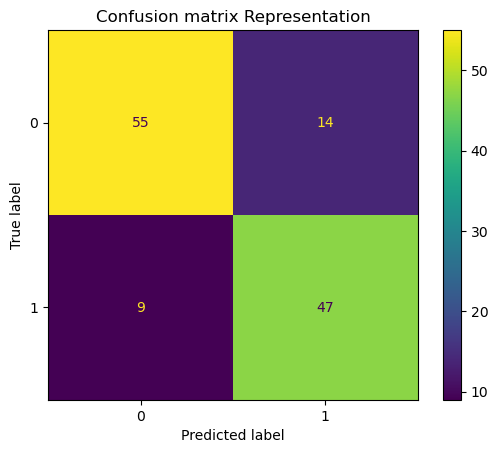

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_decisiontree)
plt.title('Confusion matrix Representation')
plt.show()

In [16]:
accuracy_score(y_test, y_pred_decisiontree)

0.816

In [17]:
print(classification_report(y_test, y_pred_decisiontree))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        69
           1       0.77      0.84      0.80        56

    accuracy                           0.82       125
   macro avg       0.81      0.82      0.82       125
weighted avg       0.82      0.82      0.82       125



In [18]:
from sklearn import tree

[Text(0.5709459459459459, 0.9545454545454546, 'x[5] <= 8.745\nsquared_error = 0.242\nsamples = 375\nvalue = 0.411'),
 Text(0.3310810810810811, 0.8636363636363636, 'x[0] <= 318.5\nsquared_error = 0.086\nsamples = 231\nvalue = 0.095'),
 Text(0.20270270270270271, 0.7727272727272727, 'x[5] <= 8.665\nsquared_error = 0.039\nsamples = 198\nvalue = 0.04'),
 Text(0.10810810810810811, 0.6818181818181818, 'x[3] <= 3.75\nsquared_error = 0.026\nsamples = 187\nvalue = 0.027'),
 Text(0.05405405405405406, 0.5909090909090909, 'x[1] <= 105.5\nsquared_error = 0.012\nsamples = 166\nvalue = 0.012'),
 Text(0.02702702702702703, 0.5, 'squared_error = 0.0\nsamples = 128\nvalue = 0.0'),
 Text(0.08108108108108109, 0.5, 'x[6] <= 0.5\nsquared_error = 0.05\nsamples = 38\nvalue = 0.053'),
 Text(0.05405405405405406, 0.4090909090909091, 'squared_error = 0.0\nsamples = 25\nvalue = 0.0'),
 Text(0.10810810810810811, 0.4090909090909091, 'x[0] <= 311.5\nsquared_error = 0.13\nsamples = 13\nvalue = 0.154'),
 Text(0.081081081

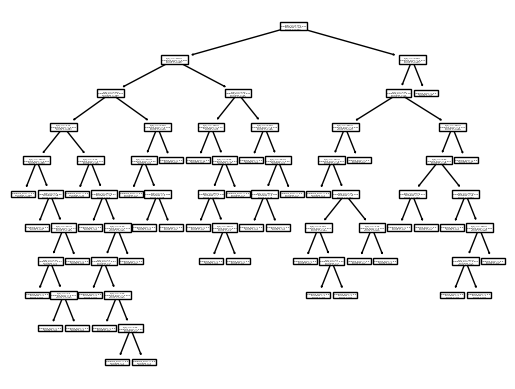

In [19]:
tree.plot_tree(model_decisionTree)